In [585]:
from splinter import Browser

In [586]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [587]:
browser = Browser('chrome')

In [588]:
browser.visit('http://uba.tw')

In [6]:
browser.find_by_text('公開')

[]

In [76]:
link = browser.find_link_by_text('公開女一級').first
link.click()

In [77]:
link = browser.find_link_by_text('球隊資訊').first
link.click()

In [78]:
team_link = browser.find_by_css("div[class='info_cnt']").first.find_by_tag('ul').first

In [84]:
teams = []
for li in team_link.find_by_tag('li'):
    teams.append({'team': li.find_by_tag('span')[1].text, 'url': li.find_by_tag('a').first['href']})

In [85]:
_ = teams[0]

In [86]:
_['url']

'http://uba.tw/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/6775E3E6-7287-4DE6-99FE-DF1269052728'

In [95]:
for team in teams:
    browser.visit(team['url'])
    team['roster'] = pd.read_html(browser.html, flavor='html5lib')[1]
    team['roster'].columns = team['roster'].iloc[0, :]
    team['roster'] = team['roster'].iloc[1:, :]
    team['games'] = [] 
 
    game_links = browser.find_by

In [108]:
num_of_game = len(browser.find_by_css("div[id='全學年度戰績'] table").first.find_by_tag('tr')) -4

In [629]:
def gen_game(element, browser):   
    df =pd.read_html(element.html, flavor='html5lib')
    gbox = df[7]
    gbox.columns = gbox.iloc[0, :]
    gbox = gbox.iloc[1:, :]

    tboxs = []
    for i,j in enumerate(gbox.iloc[:, 0]):
        tbox = {}
        tbox['team'] = j
        tdf = df[i+7+1]
        tdf.columns = tdf.iloc[1, :]
        tdf = tdf.iloc[3:, :]
        
        tdf.columns = ['背號', '姓名'] + list(tdf.columns[2:])
        
        tdf['PTS'] = tdf['得分'].astype(int)
        
        tdf['ORB'] = tdf['進攻'].astype(int)
        tdf['DRB'] = tdf['防守'].astype(int)
        tdf['TRB'] = tdf['ORB'] + tdf['DRB']
        
        tdf['AST'] = tdf['助攻'].astype(int)
        tdf['FOUL'] = tdf['犯規'].astype(int)
        
        tdf['TOV'] = tdf['失誤'].astype(int)
        
        tdf['STL'] = tdf['抄截'].astype(int)
        tdf['BLK'] = tdf['阻攻'].astype(int)
        tdf['MP'] = tdf['時間'].apply(lambda x: None if pd.isna(x) else int(x)) 
        
        tdf['2FGM'] = tdf['二分'].apply(lambda x: int(x.split('-')[0]))

        tdf['2FGA'] = tdf['二分'].apply(lambda x: int(x.split('-')[1]))

        tdf['3FGM'] = tdf['三分'].apply(lambda x: int(x.split('-')[0]))
        tdf['3FGA'] = tdf['三分'].apply(lambda x: int(x.split('-')[1]))

        tdf['FGA'] = tdf['2FGA'] + tdf['3FGA']
        tdf['FGM'] = tdf['2FGM'] + tdf['3FGM']

        tdf['FTA'] = tdf['罰球'].apply(lambda x: int(x.split('-')[0]))
        tdf['FTM'] = tdf['罰球'].apply(lambda x: int(x.split('-')[1]))
        
        tbox['df'] = tdf[['姓名', '背號', '先發', 'MP', 'PTS', '2FGA', '2FGM', '3FGA', '3FGM', 'FTA', 'FTM', 'FGA', 'FGM', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'AST', 'TOV', 'FOUL']]
        tboxs.append(tbox)
        
    pbp_links = browser.find_link_by_partial_href('PlayByPlay')
    if len(pbp_links) >0:
        pbp = pd.read_html(pbp_links['href'], flavor='html5lib')[0].reset_index(drop=True)
        pbp.columns = pbp.iloc[0, :]
        pbp = pbp.iloc[:0:-1, :]
        pbp

        return {'gbox': gbox, 'tbox': tboxs, 'play': pbp}
    else:
        return {'gbox': gbox, 'tbox': tboxs}

In [630]:
games = []
for i in range(num_of_game):
    browser.find_by_css("div[id='全學年度戰績'] table").first.find_by_tag('tr')[i+2].find_by_tag('a').first.click()
    game = gen_game(browser.find_by_css("div[class='min_content']").first, browser)
    browser.back()
    games.append(game)

In [631]:
games[0]['tbox'][0]['df']

姓名   背號   先發    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  ...   FGA  FGM  \
3     陳育緹    5    X  21.0   15     8     3     7     3    0  ...    15    6   
4     歐馨嬪    7    X  23.0    5     6     2     0     0    1  ...     6    2   
5     吳孟蕎   11    X  21.0    2     9     1     0     0    0  ...     9    1   
6      林蝶   12    X  21.0   14    11     4     0     0    6  ...    11    4   
7     梁雅媚   28    X  24.0    5     4     1     2     1    0  ...     6    2   
8     宋妤涵    0  NaN  17.0    6     6     3     0     0    0  ...     6    3   
9     許玟瑄    1  NaN  22.0   12    12     5     0     0    2  ...    12    5   
10    蘇嘉嫻    2  NaN  19.0    8     7     4     2     0    0  ...     9    4   
11    邱思婷    3  NaN   0.0    0     0     0     0     0    0  ...     0    0   
12     方妤    8  NaN  16.0    9     3     3     1     1    0  ...     4    4   
13    胡景筑    9  NaN  16.0   12     8     3     0     0    6  ...     8    3   
14    高慈君   27  NaN   0.0    0     0     0     0     0    0  ...     0    0   
15  TOTAL  NaN  NaN   NaN   88    74    29    12     5   15  ...    86   34   

    ORB  DRB  TRB  STL  BLK  AST  TOV  FOUL  
3     0    0    0    3    0    1    0     1  
4     1    5    6    2    0    5    1     1  
5     2    0    2    2    1    1    2     0  
6     2    4    6    3    0    5    1     3  
7     2    2    4    4    0    5    3     1  
8     0    2    2    4    0    1    3     0  
9     2    4    6    4    0    1    1     2  
10    5    3    8    2    0    7    3     3  
11    0    0    0    0    0    0    0     0  
12    0    2    2    3    0    0    1     2  
13    1    3    4    0    0    2    0     0  
14    0    0    0    0    0    0    0     0  
15   15   25   40   27    1   28   15    13  

[13 rows x 21 columns]

In [592]:
def gen_adv(tdf):

    tdf['TSA'] = tdf['FGA'] + tdf['FTA']* 0.44

    tdf['TS%'] = tdf['PTS'] / (2 * tdf['TSA']) * 100

    tdf['eFG%'] = (1.5 * tdf['3FGM'] + tdf['2FGM']) / tdf['FGA'] * 100
    
    return tdf

In [593]:
def gen_type(df):
    for i in ['投籃', '籃板', '犯規', '失誤', '換下', '抄截', '助攻', '罰球']:
        df[i] = df.apply(lambda x: i in x['文字直播'], axis=1)

In [594]:
def stats_compare(series, team):

    team_stats = [[j['df'] for j in i['tbox'] if j['team'] == team][0]  for i in series]
    op_stats = [[j['df'] for j in i['tbox'] if j['team'] != team][0]  for i in series]
    
    return pd.concat(team_stats), pd.concat(op_stats)

In [596]:
df1, df2 = [gen_adv(i.groupby(['姓名', '背號']).sum().reset_index()) for i in stats_compare(games, '世新大學')]

In [597]:
for df in [df1, df2]:
    for cat in ['2FG', '3FG', 'FG', 'FT']:
        df[f'{cat}%'] = 100 * df[f'{cat}M'] / df[f'{cat}A']

In [598]:
import altair as alt

In [611]:
chart = alt.Chart(df1).mark_point().interactive()

In [614]:
df1['TSA_per_min'] = df1['TSA'] / df1['MP']

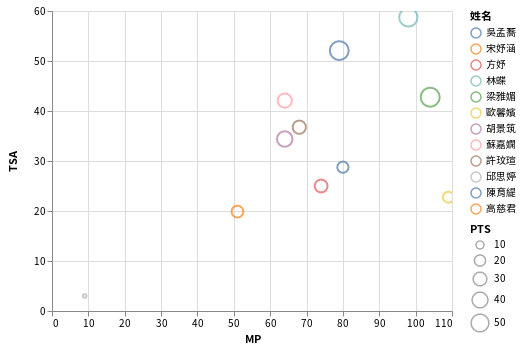

In [619]:
alt.Chart(df1).mark_point().encode(x = 'MP', y='TSA', color='姓名', size='PTS', tooltip=['姓名', '背號']).interactive()

In [615]:
df1

姓名  背號     MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM     ...         TSA  \
0   吳孟蕎  11   80.0   20    27     8     0     0    4    8     ...       28.76   
1   宋妤涵   0   51.0   22    18    10     1     0    2    2     ...       19.88   
2    方妤   8   74.0   26    16     7     9     4    0    0     ...       25.00   
3    林蝶  12   98.0   53    50    20     3     0   13   22     ...       58.72   
4   梁雅媚  28  104.0   57    32    19     9     5    4    6     ...       42.76   
5   歐馨嬪   7  109.0   19    16     6     5     1    4    6     ...       22.76   
6   胡景筑   9   64.0   38    30    14     0     0   10   14     ...       34.40   
7   蘇嘉嫻   2   64.0   32    30    11     9     1    7   10     ...       42.08   
8   許玟瑄   1   68.0   28    35    12     0     0    4    7     ...       36.76   
9   邱思婷   3    9.0    2     2     1     1     0    0    0     ...        3.00   
10  陳育緹   5   79.0   56    24     8    25    11    7   10     ...       52.08   
11  高慈君  27    0.0    0     0     0     0     0    0    0     ...        0.00   

          TS%       eFG%       2FG%       3FG%        FG%         FT%  \
0   34.770515  29.629630  29.629630        NaN  29.629630  200.000000   
1   55.331992  52.631579  55.555556   0.000000  52.631579  100.000000   
2   52.000000  52.000000  43.750000  44.444444  44.000000         NaN   
3   45.129428  37.735849  40.000000   0.000000  37.735849  169.230769   
4   66.651076  64.634146  59.375000  55.555556  58.536585  150.000000   
5   41.739895  35.714286  37.500000  20.000000  33.333333  150.000000   
6   55.232558  46.666667  46.666667        NaN  46.666667  140.000000   
7   38.022814  32.051282  36.666667  11.111111  30.769231  142.857143   
8   38.084875  34.285714  34.285714        NaN  34.285714  175.000000   
9   33.333333  33.333333  50.000000   0.000000  33.333333         NaN   
10  53.763441  50.000000  33.333333  44.000000  38.775510  142.857143   
11        NaN        NaN        NaN        NaN        NaN         NaN   

          TOV%       AST%  TSA_per_min  
0    17.385257  13.908206     0.359500  
1    30.181087  15.090543     0.389804  
2    24.000000   4.000000     0.337838  
3     3.405995  18.732970     0.599184  
4    23.386342  44.434051     0.411154  
5    35.149385  70.298770     0.208807  
6    17.441860  29.069767     0.537500  
7    16.634981  26.140684     0.657500  
8    16.322089  13.601741     0.540588  
9   100.000000   0.000000     0.333333  
10   11.520737   3.840246     0.659241  
11         NaN        NaN          NaN  

[12 rows x 30 columns]

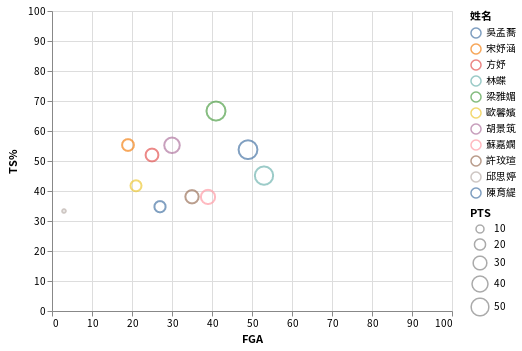

In [612]:
chart.encode(x = alt.X('FGA', scale= alt.Scale(domain = [0 , 100])), y =  alt.Y('TS%', scale = alt.Scale(domain = [0, 100])), size = 'PTS', color='姓名', tooltip = ['姓名', '背號', 'PTS'])

出手偏好

出手

In [601]:
chart = alt.Chart(df1.sort_values('FGA', ascending=False).reset_index(drop=True))

In [602]:
two_per = chart.mark_bar(color='blue', opacity=0.5).encode(y=alt.Y('姓名', sort=sort_temp('FGA')), x=alt.X('2FGA', title='兩分')) 
two_per += chart.mark_bar(color='blue').encode(y=alt.Y('姓名', sort=sort_temp('FGA')), x=alt.X('2FGM'))

three_per = chart.mark_bar(color='purple', opacity=0.5).encode(y=alt.Y('姓名'), x=alt.X('3FGA', title='三分')) 
three_per += chart.mark_bar(color='purle').encode(y='姓名', x=alt.X('3FGM'))

total = chart.mark_bar(color='black', opacity=0.5).encode(y=alt.Y('姓名'), x=alt.X('FGA', title='三分出手佔總出手')) 
total += chart.mark_bar(color='purle').encode(y='姓名', x=alt.X('3FGA'))

ass = chart.mark_bar(color='orange', opacity=0.5).encode(y=alt.Y('姓名'), x=alt.X('TSA', title='助攻率')) 
ass += chart.mark_bar(color='orange').encode(y='姓名', x=alt.X('AST'))

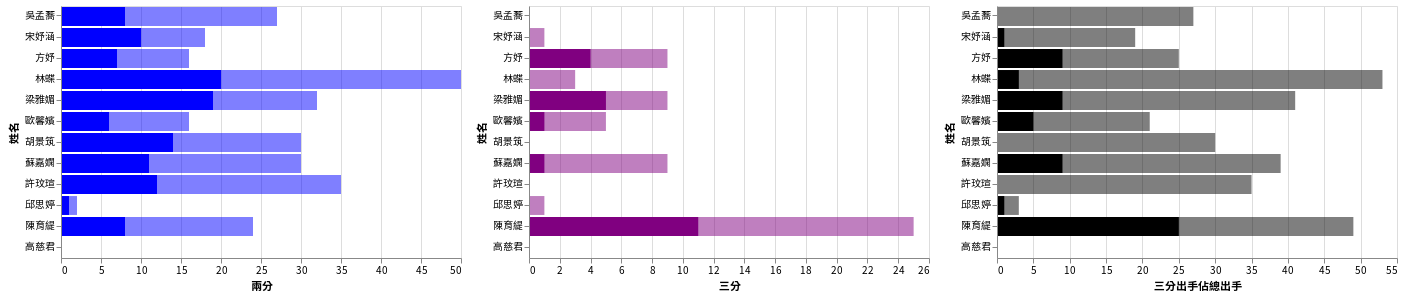

In [603]:
two_per | three_per | total

In [605]:
tov = chart.mark_bar(color='blue', opacity=0.5).encode(y=alt.Y('姓名', sort=sort_temp('FGA')), x=alt.X('TSA', title='失誤率')) 
tov += chart.mark_bar(color='blue').encode(y=alt.Y('姓名', sort=sort_temp('FGA')), x=alt.X('TOV'))

ast = chart.mark_bar(color='purple', opacity=0.5).encode(y=alt.Y('姓名'), x=alt.X('TSA', title='助攻率')) 
ast += chart.mark_bar(color='purle').encode(y='姓名', x=alt.X('AST'))

In [606]:
def gen_pos(df):
    
    df['TOV%'] = 100 * df['TOV'] / df['TSA']
    df['AST%'] = 100 * df['AST'] / df['TSA']
    return df
    

In [607]:
gen_pos(df1)

姓名  背號     MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM    ...      FOUL  \
0   吳孟蕎  11   80.0   20    27     8     0     0    4    8    ...         7   
1   宋妤涵   0   51.0   22    18    10     1     0    2    2    ...         6   
2    方妤   8   74.0   26    16     7     9     4    0    0    ...         6   
3    林蝶  12   98.0   53    50    20     3     0   13   22    ...         7   
4   梁雅媚  28  104.0   57    32    19     9     5    4    6    ...         8   
5   歐馨嬪   7  109.0   19    16     6     5     1    4    6    ...         2   
6   胡景筑   9   64.0   38    30    14     0     0   10   14    ...         2   
7   蘇嘉嫻   2   64.0   32    30    11     9     1    7   10    ...         6   
8   許玟瑄   1   68.0   28    35    12     0     0    4    7    ...        10   
9   邱思婷   3    9.0    2     2     1     1     0    0    0    ...         1   
10  陳育緹   5   79.0   56    24     8    25    11    7   10    ...         4   
11  高慈君  27    0.0    0     0     0     0     0    0    0    ...         0   

      TSA        TS%       eFG%       2FG%       3FG%        FG%         FT%  \
0   28.76  34.770515  29.629630  29.629630        NaN  29.629630  200.000000   
1   19.88  55.331992  52.631579  55.555556   0.000000  52.631579  100.000000   
2   25.00  52.000000  52.000000  43.750000  44.444444  44.000000         NaN   
3   58.72  45.129428  37.735849  40.000000   0.000000  37.735849  169.230769   
4   42.76  66.651076  64.634146  59.375000  55.555556  58.536585  150.000000   
5   22.76  41.739895  35.714286  37.500000  20.000000  33.333333  150.000000   
6   34.40  55.232558  46.666667  46.666667        NaN  46.666667  140.000000   
7   42.08  38.022814  32.051282  36.666667  11.111111  30.769231  142.857143   
8   36.76  38.084875  34.285714  34.285714        NaN  34.285714  175.000000   
9    3.00  33.333333  33.333333  50.000000   0.000000  33.333333         NaN   
10  52.08  53.763441  50.000000  33.333333  44.000000  38.775510  142.857143   
11   0.00        NaN        NaN        NaN        NaN        NaN         NaN   

          TOV%       AST%  
0    17.385257  13.908206  
1    30.181087  15.090543  
2    24.000000   4.000000  
3     3.405995  18.732970  
4    23.386342  44.434051  
5    35.149385  70.298770  
6    17.441860  29.069767  
7    16.634981  26.140684  
8    16.322089  13.601741  
9   100.000000   0.000000  
10   11.520737   3.840246  
11         NaN        NaN  

[12 rows x 29 columns]

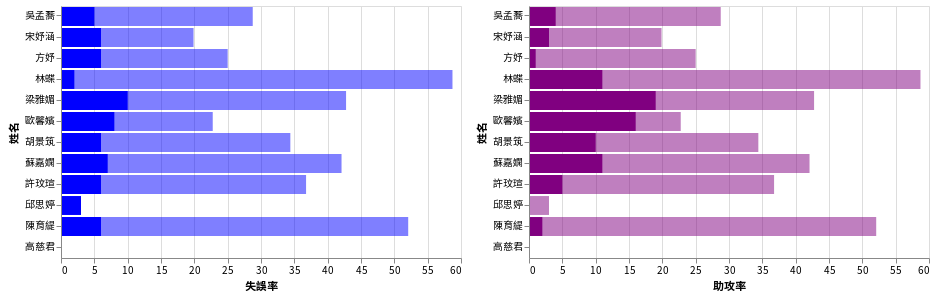

In [608]:
tov | ast

In [564]:
col = []
for cat in ['AST', 'TOV', 'FGA']:
    pdf = df1.loc[:,['背號', '姓名'] + [cat]]
    pdf.columns = list(pdf.columns)[:-1] + ['value']
    pdf['type'] = cat
    col.append(pdf)

col = pd.concat(col)

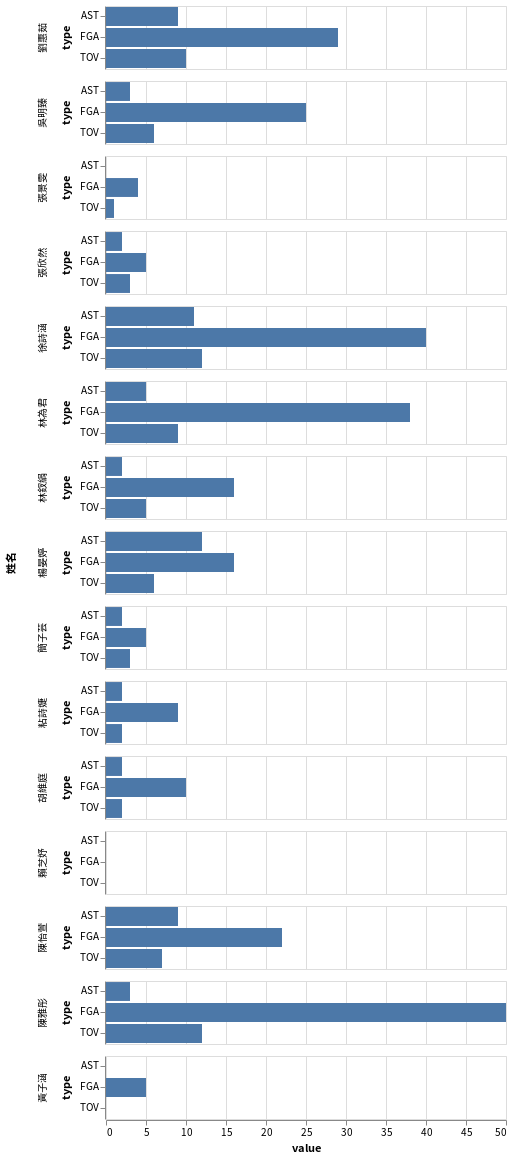

In [570]:
alt.Chart(col).mark_bar().encode(y='type', x='value', row='姓名')

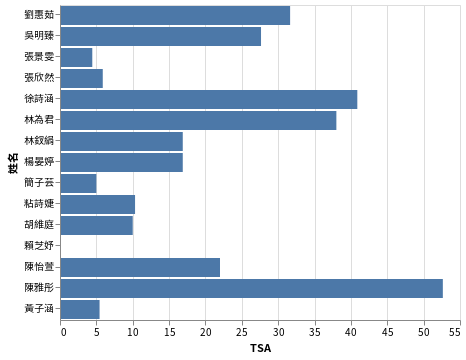

In [547]:
chart.mark_bar().encode(y='姓名', x='TSA')

In [527]:
[i.get('play', None) for i in games][3]

0     順序 節數         時間 場上球員                           文字直播    球隊
380    1  1  10:00.000  NaN                       臺灣師大取得球權  臺灣師大
379    2  1  09:41.797  楊晏婷     楊晏婷失誤 (1次失誤) 抄截：邱怡禎 (1次抄截)  臺灣師大
378    3  1  09:29.870  莫翊妏                莫翊妏2分投籃：不中 (0分)  北市大學
377    4  1  09:29.870  陳怡萱          陳怡萱籃板 (進攻籃板:0 防守籃板:1)  臺灣師大
376    5  1  09:23.443  陳怡萱     陳怡萱失誤 (1次失誤) 抄截：陳亭羽 (1次抄截)  臺灣師大
375    6  1  09:07.530  邱怡禎   邱怡禎3分投籃：中 (3分) 助攻：莫翊妏 (1次助攻)  北市大學
374    7  1  08:47.563  劉惠茹                劉惠茹2分投籃：不中 (0分)  臺灣師大
373    8  1  08:47.563  陳怡萱          陳怡萱籃板 (進攻籃板:1 防守籃板:1)  臺灣師大
372    9  1  08:39.460  胡維庭   胡維庭2分投籃：中 (2分) 助攻：陳怡萱 (1次助攻)  臺灣師大
371   10  1  08:27.673  莫翊妏                莫翊妏3分投籃：不中 (0分)  北市大學
370   11  1  08:17.707  徐詩涵                      徐詩涵替換下楊晏婷  臺灣師大
369   12  1  08:08.683  陳雅彤   陳雅彤2分投籃：中 (2分) 助攻：陳怡萱 (2次助攻)  臺灣師大
368   13  1  07:51.870  邱怡禎                邱怡禎2分投籃：不中 (3分)  北市大學
367   14  1  07:51.870  胡維庭          胡維庭籃板 (進攻籃板:0 防守籃板:1)  臺灣師大
366   15  1  07:40.110  陳雅彤                 陳雅彤2分投籃：中 (4分)  臺灣師大
365   16  1  07:23.620  陳亭羽                陳亭羽2分投籃：不中 (0分)  北市大學
364   17  1  07:23.187  陳怡萱                   陳怡萱犯規 (1次犯規)  臺灣師大
363   18  1  07:14.397  史靜茹  史靜茹2分投籃：不中 (0分) 阻攻：陳雅彤 (1次阻攻)  北市大學
362   19  1  07:14.397  陳怡萱          陳怡萱籃板 (進攻籃板:1 防守籃板:2)  臺灣師大
361   20  1  07:09.880  陳怡萱     陳怡萱失誤 (2次失誤) 抄截：史靜茹 (1次抄截)  臺灣師大
360   21  1  06:54.480  莫翊妏                莫翊妏3分投籃：不中 (0分)  北市大學
359   22  1  06:38.027  劉惠茹                劉惠茹3分投籃：不中 (0分)  臺灣師大
358   23  1  06:38.027  朱育勤          朱育勤籃板 (進攻籃板:0 防守籃板:1)  北市大學
357   24  1  06:34.133  朱育勤     朱育勤失誤 (1次失誤) 抄截：胡維庭 (1次抄截)  北市大學
356   25  1  06:29.420  胡維庭                胡維庭2分投籃：不中 (2分)  臺灣師大
355   26  1  06:29.420  史靜茹          史靜茹籃板 (進攻籃板:0 防守籃板:1)  北市大學
354   27  1  06:16.603  陳怡萱                   陳怡萱犯規 (2次犯規)  臺灣師大
353   28  1  06:16.603  吳明臻                      吳明臻替換下胡維庭  臺灣師大
352   29  1  06:16.603  葉鈺琳                      葉鈺琳替換下邱怡禎  北市大學
351   30  1  06:16.603  史靜茹                 史靜茹2分投籃：中 (2分)  北市大學
..   ... ..        ...  ...                            ...   ...
30   351  4  02:55.963  陳雅彤          陳雅彤籃板 (進攻籃板:2 防守籃板:4)  臺灣師大
29   352  4  02:55.193  梁孟勤                   梁孟勤犯規 (1次犯規)  北市大學
28   353  4  02:55.193  胡維庭                      胡維庭替換下粘詩婕  臺灣師大
27   354  4  02:55.193  陳雅彤           陳雅彤 2次罰球 第1罰：中 (14分)  臺灣師大
26   355  4  02:55.193  陳雅彤           陳雅彤 2次罰球 第2罰：中 (15分)  臺灣師大
25   356  4  02:39.533  陳亭羽                   陳亭羽失誤 (4次失誤)  北市大學
24   357  4  02:26.197  陳雅彤               陳雅彤2分投籃：不中 (15分)  臺灣師大
23   358  4  02:15.157  林釵絹                林釵絹2分投籃：不中 (4分)  臺灣師大
22   359  4  02:15.157  莫翊妏          莫翊妏籃板 (進攻籃板:1 防守籃板:2)  北市大學
21   360  4  01:57.847  陳亭羽               陳亭羽3分投籃：不中 (18分)  北市大學
20   361  4  01:57.847  林庭鈺          林庭鈺籃板 (進攻籃板:2 防守籃板:2)  北市大學
19   362  4  01:56.843  NaN                      暫停 : 隊伍暫停  臺灣師大
18   363  4  01:56.843  林庭鈺                 林庭鈺2分投籃：中 (2分)  北市大學
17   364  4  01:41.337  林釵絹                林釵絹2分投籃：不中 (4分)  臺灣師大
16   365  4  01:21.600  胡維庭                   胡維庭犯規 (2次犯規)  臺灣師大
15   366  4  01:21.600  梁孟勤           梁孟勤 2次罰球 第1罰：不中 (4分)  北市大學
14   367  4  01:21.600  梁孟勤            梁孟勤 2次罰球 第2罰：中 (5分)  北市大學
13   368  4  01:13.080  梁孟勤                   梁孟勤犯規 (2次犯規)  北市大學
12   369  4  01:13.080  劉惠茹            劉惠茹 2次罰球 第1罰：中 (8分)  臺灣師大
11   370  4  01:13.080  劉惠茹           劉惠茹 2次罰球 第2罰：不中 (8分)  臺灣師大
10   371  4  01:13.080  胡維庭          胡維庭籃板 (進攻籃板:1 防守籃板:2)  臺灣師大
9    372  4  01:06.907  林釵絹                林釵絹3分投籃：不中 (4分)  臺灣師大
8    373  4  01:06.907  徐詩涵          徐詩涵籃板 (進攻籃板:1 防守籃板:2)  臺灣師大
7    374  4  00:51.173  徐詩涵               徐詩涵3分投籃：不中 (10分)  臺灣師大
6    375  4  00:51.173  陳亭羽          陳亭羽籃板 (進攻籃板:3 防守籃板:7)  北市大學
5    376  4  00:45.530  徐詩涵                   徐詩涵犯規 (3次犯規)  臺灣師大
4    377  4  00:39.170  林庭鈺   林庭鈺2分投籃：中 (4分) 助攻：朱育勤 (4次助攻)  北市大學
3    378  4  00:21.127  胡維庭     胡維庭失誤 (1次失誤) 抄截：朱育勤 (1次抄截)  臺灣師大
2    379  4  00:00.000  NaN                           比賽結束   NaN
1    380  4  00:00.000  莫翊妏        

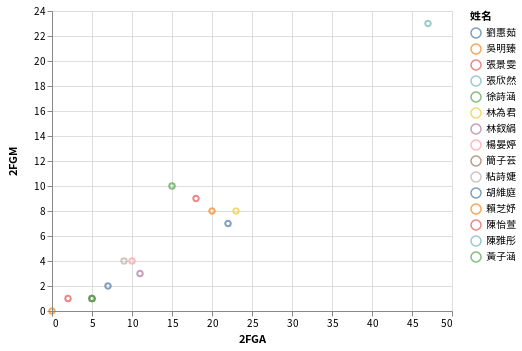

In [520]:
chart.mark_point().encode(x='2FGA', y='2FGM', color='姓名') + chart.mark_line().encode(x='2FGA', y='')

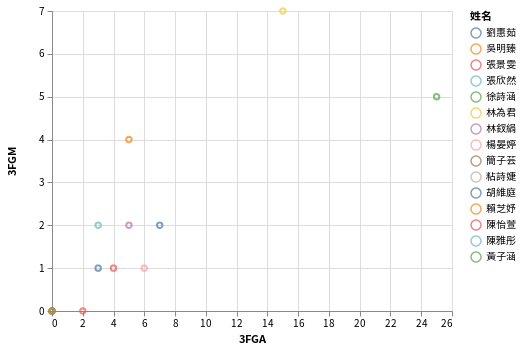

In [521]:
chart.mark_point().encode(x='3FGA', y='3FGM', color='姓名')

In [505]:
sort_temp = lambda x: alt.EncodingSortField(op='sum', field=x, order='descending')

In [528]:
two_per.encode(x='FGA', y=alt.Y('姓名', sort=sort_temp))

ValueError: FGA encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

LayerChart({
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'FGA'
    }),
    y: Y({
      shorthand: '姓名',
      sort: <function <lambda> at 0x00000000113ef6a0>
    })
  }),
  layer: [Chart({
    data:      姓名  背號     MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  FTM     ...      AST  \
    0   陳雅彤  12  118.0   58    47    23     3     2    6    7     ...        3   
    1   徐詩涵  18  110.0   37    15    10    25     5    2    4     ...       11   
    2   林為君   8   71.0   37    23     8    15     7    0    0     ...        5   
    3   劉惠茹  17   95.0   26    22     7     7     2    6    8     ...        9   
    4   吳明臻  13   77.0   34    20     8     5     4    6   11     ...        3   
    5   陳怡萱  11   95.0   21    18     9     4     1    0    0     ...        9   
    6   林釵絹   0   35.0   14    11     3     5     2    2    2     ...        2   
    7   楊晏婷   3   59.0   13    10     4     6     1    2    5     ...       12   
    8   胡維庭  24   45.0    7     7     2     3     

In [ ]:
def get_total_time():    
    for i in pdf.unique('節次'):
        pdf.loc[pdf['節次']]

In [187]:
pdf

0     順序 節數         時間 場上球員                           文字直播    球隊     投籃  \
321    1  1  10:00.000  NaN                       成功大學取得球權  成功大學  False   
320    2  1  10:00.000  児玉楓                      児玉楓替換下陳千惠  文化大學  False   
319    3  1  06:11.793  方曉晴                方曉晴2分投籃：不中 (0分)  文化大學   True   
318    4  1  06:11.793  戴宜庭          戴宜庭籃板 (進攻籃板:1 防守籃板:0)  文化大學  False   
317    5  1  06:08.627  陳亭安                   陳亭安犯規 (1次犯規)  成功大學  False   
316    6  1  06:08.627  蔡卉妮                      蔡卉妮替換下王勻妤  成功大學  False   
315    7  1  06:08.627  戴宜庭           戴宜庭 2次罰球 第1罰：不中 (0分)  文化大學  False   
314    8  1  06:08.627  陳雅婷           陳雅婷 2次罰球 第1罰：不中 (0分)  成功大學  False   
313    9  1  06:08.627  戴宜庭           戴宜庭 2次罰球 第2罰：不中 (0分)  文化大學  False   
312   10  1  06:08.627  陳雅婷            陳雅婷 2次罰球 第2罰：中 (1分)  成功大學  False   
311   11  1  05:55.627  陳雅婷                   陳雅婷犯規 (1次犯規)  成功大學  False   
310   12  1  05:55.627  陳雅婷                   陳雅婷失誤 (1次失誤)  成功大學  False   
309   13  1  05:47.577  李依蒨                 李依蒨2分投籃：中 (2分)  文化大學   True   
308   14  1  05:42.980  方曉晴                方曉晴2分投籃：不中 (0分)  文化大學   True   
307   15  1  05:39.273  徐玉蓮                 徐玉蓮2分投籃：中 (2分)  文化大學   True   
306   16  1  05:36.317  徐玉蓮            徐玉蓮 1次罰球 第1罰：中 (3分)  文化大學  False   
305   17  1  05:28.013  李依蒨                   李依蒨失誤 (1次失誤)  文化大學  False   
304   18  1  05:27.407  戴宜庭            戴宜庭 2次罰球 第1罰：中 (1分)  文化大學  False   
303   19  1  05:27.407  戴宜庭            戴宜庭 2次罰球 第2罰：中 (2分)  文化大學  False   
302   20  1  05:21.687  戴宜庭           戴宜庭 2次罰球 第1罰：不中 (2分)  文化大學  False   
301   21  1  05:21.687  戴宜庭            戴宜庭 2次罰球 第2罰：中 (3分)  文化大學  False   
300   22  1  05:16.157  蔡卉妮                蔡卉妮2分投籃：不中 (0分)  成功大學   True   
299   23  1  05:16.157  陳亭安          陳亭安籃板 (進攻籃板:1 防守籃板:0)  成功大學  False   
298   24  1  05:11.230  陳亭安     陳亭安失誤 (1次失誤) 抄截：戴宜庭 (1次抄截)  成功大學  False   
297   25  1  04:59.167  児玉楓                児玉楓2分投籃：不中 (0分)  文化大學   True   
296   26  1  04:59.167  陳亭安          陳亭安籃板 (進攻籃板:1 防守籃板:1)  成功大學  False   
295   27  1  04:50.260  李佳潔     李佳潔失誤 (1次失誤) 抄截：方曉晴 (1次抄截)  成功大學  False   
294   28  1  04:41.957  戴宜庭                戴宜庭3分投籃：不中 (3分)  文化大學   True   
293   29  1  04:41.957  周沛彤          周沛彤籃板 (進攻籃板:0 防守籃板:1)  成功大學  False   
292   30  1  04:28.423  周沛彤     周沛彤失誤 (1次失誤) 抄截：李依蒨 (1次抄截)  成功大學  False   
..   ... ..        ...  ...                            ...   ...    ...   
30   292  4  03:49.677  王勻妤  王勻妤3分投籃：中 (12分) 助攻：李佳潔 (1次助攻)  成功大學   True   
29   293  4  03:23.683  陳千惠   陳千惠2分投籃：中 (2分) 助攻：児玉楓 (3次助攻)  文化大學   True   
28   294  4  03:08.763  李依蒨                      李依蒨替換下徐玉蓮  文化大學  False   
27   295  4  03:08.763  劉倩伶                      劉倩伶替換下陳千惠  文化大學  False   
26   296  4  02:58.133  李佳潔                李佳潔2分投籃：中 (15分)  成功大學   True   
25   297  4  02:37.317  周沛彤                   周沛彤犯規 (1次犯規)  成功大學  False   
24   298  4  02:37.317  楊靜儀                      楊靜儀替換下王勻妤  成功大學  False   
23   299  4  02:37.317  児玉楓           児玉楓 2次罰球 第1罰：中 (16分)  文化大學  False   
22   300  4  02:30.043  周沛彤                 周沛彤2分投籃：中 (2分)  成功大學   True   
21   301  4  02:11.063  李依蒨   李依蒨3分投籃：中 (9分) 助攻：管韻慈 (1次助攻)  文化大學   True   
20   302  4  01:48.533  李佳潔               李佳潔2分投籃：不中 (15分)  成功大學   True   
19   303  4  01:48.533  管韻慈          管韻慈籃板 (進攻籃板:0 防守籃板:1)  文化大學  False   
18   304  4  01:32.577  児玉楓               児玉楓2分投籃：不中 (16分)  文化大學   True   
17   305  4  01:32.577  陳亭安          陳亭安籃板 (進攻籃板:1 防守籃板:4)  成功大學  False   
16   306  4  01:17.727  周沛彤                 周沛彤2分投籃：中 (4分)  成功大學   True   
15   307  4  01:08.647  江曉蘋                      江曉蘋替換下児玉楓  文化大學  False   
14   308  4  01:00.020  李依蒨                李依蒨2分投籃：不中 (9分)  文化大學   True   
13   309  4  01:00.020  蘇怡菁         蘇怡菁籃板 (進攻籃板:9 防守籃板:10)  文化大學  False   
12   310  4  00:56.347  蘇怡菁                蘇怡菁2分投籃：中 (18分)  文化大學   True   
11   311  4  00:34.850  陳亭安                陳亭安2分投籃：不中 (2分)  成功大學   True   
10   312  4  00:34.850  周沛彤          周沛彤籃板 (進攻籃板:2 防守籃板:1)  成功大學  False   
9    313  4  00:29.687  溫

In [620]:
pdf = games[0]['play']

In [624]:
roster = pd.read_html('http://uba.tw/107/%E5%85%AC%E9%96%8B%E5%A5%B3%E4%B8%80%E7%B4%9A/Team/Index/F99A44E3-7E37-41B9-A474-4C8056BAD16F', flavor='html5lib')

In [625]:
roster[1]

0    1    2    3            4       5      6
0      背號   姓名   位置   年級           科系      身高     體重
1       0  宋妤涵  NaN  一年級     廣播電視電影學系  163.00  57.00
2       1  許玟瑄  NaN  一年級     廣播電視電影學系  178.00  71.00
3       2  蘇嘉嫻  NaN  一年級     廣播電視電影學系  175.00  67.00
4       3  邱思婷  NaN  二年級       傳播管理學系  155.00  50.00
5       5  陳育緹  NaN  二年級     廣播電視電影學系  158.00  50.00
6       7  歐馨嬪  NaN  四年級         觀光學系  167.00  59.00
7       8   方妤  NaN  三年級       口語傳播學系  172.00  67.00
8       9  胡景筑  NaN  四年級       口語傳播學系  170.00  64.00
9      11  吳孟蕎  NaN  二年級         觀光學系  179.00  70.00
10     12   林蝶  NaN  二年級     廣播電視電影學系  179.00  65.00
11     27  高慈君  NaN  二年級    公共關係暨廣告學系  175.00  69.00
12     28  梁雅媚  NaN  四年級    公共關係暨廣告學系  161.00  61.00
13     96  林庭誼  NaN  三年級         新聞學系  168.00  56.00
14     97  時雯家  NaN  二年級         英語學系  155.00  41.00
15     98  方奕安  NaN  四年級  廣播電視電影學系廣播組  169.00  65.00
16     99  余亞倩  NaN   延畢       傳播管理學系  162.00  57.00
17  TOTAL  NaN  NaN  NaN          NaN   167.9   60.6

In [632]:
game['tbox'][0]['df']

姓名   背號   先發    MP  PTS  2FGA  2FGM  3FGA  3FGM  FTA  ...   FGA  FGM  \
3     陳育緹    5    X  14.0    3     1     0     2     0    3  ...     3    0   
4     歐馨嬪    7    X  35.0    4     4     1     0     0    2  ...     4    1   
5     吳孟蕎   11    X  12.0    0     1     0     0     0    0  ...     1    0   
6      林蝶   12    X  35.0   13    14     5     1     0    3  ...    15    5   
7     梁雅媚   28    X  31.0   23    10     7     5     3    0  ...    15   10   
8     宋妤涵    0  NaN   5.0    0     0     0     0     0    0  ...     0    0   
9     許玟瑄    1  NaN  10.0    2     4     1     0     0    0  ...     4    1   
10    蘇嘉嫻    2  NaN  17.0   11     8     3     2     1    2  ...    10    4   
11    邱思婷    3  NaN   0.0    0     0     0     0     0    0  ...     0    0   
12     方妤    8  NaN  23.0    6     4     0     4     2    0  ...     8    2   
13    胡景筑    9  NaN  18.0    4     7     1     0     0    2  ...     7    1   
14    高慈君   27  NaN   0.0    0     0     0     0     0    0  ...     0    0   
15  TOTAL  NaN  NaN   NaN   66    53    18    14     6   12  ...    67   24   

    ORB  DRB  TRB  STL  BLK  AST  TOV  FOUL  
3     0    0    0    1    0    0    3     1  
4     1    2    3    5    0    4    3     1  
5     1    2    3    0    0    0    2     0  
6     5   11   16    3    2    2    1     2  
7     0    2    2    1    0    2    3     2  
8     0    0    0    0    0    1    1     0  
9     0    2    2    0    0    0    2     2  
10    3    3    6    1    0    0    1     1  
11    0    0    0    0    0    0    0     0  
12    0    0    0    0    0    0    0     0  
13    0    1    1    0    0    3    3     1  
14    0    0    0    0    0    0    0     0  
15   10   23   33   11    2   12   19    10  

[13 rows x 21 columns]

In [633]:
def game_roster(team, game):
    df = [i['df'] for i in game['tbox'] if i ['team'] == team][0]
    starting = df.loc[df['先發'] == 'X', '姓名']
    return starting

In [634]:
game_roster('世新大學', games[0])

3    陳育緹
4    歐馨嬪
5    吳孟蕎
6     林蝶
7    梁雅媚
Name: 姓名, dtype: object

In [645]:
def get_sub(x):
    
    if '換下' in x['文字直播']:
        return 1
    else:
        return 0

In [666]:
'123123'.split('23')

['1', '1', '']

In [691]:
def get_ast(x):
    
    if all([i in x['文字直播'] for  i in ['助攻', '投籃']]):
        shooter = x['文字直播'].split('投籃')[0][:-2]
        passer = x['文字直播'].split('助攻')[1].split('(')[0][1:]
        return shooter, passer
    else:
        return None

In [694]:
[i for i in pdf.apply(get_ast, axis=1) if i != None]

[('劉赫媞', '張文瀞 '),
 ('陳育緹', '林蝶 '),
 ('陳育緹', '歐馨嬪 '),
 ('孫明秀', '劉赫媞 '),
 ('陳育緹', '歐馨嬪 '),
 ('陳育緹', '歐馨嬪 '),
 ('陳心', '林靜怡 '),
 ('張文瀞', '孫明秀 '),
 ('蘇嘉嫻', '胡景筑 '),
 ('方妤', '歐馨嬪 '),
 ('方妤', '胡景筑 '),
 ('方妤', '蘇嘉嫻 '),
 ('許玟瑄', '蘇嘉嫻 '),
 ('廖珮連', '王曦晨 '),
 ('廖子誼', '劉赫媞 '),
 ('陳心', '廖子誼 '),
 ('林蝶', '宋妤涵 '),
 ('方妤', '林蝶 '),
 ('孫明秀', '廖子誼 '),
 ('林蝶', '陳育緹 '),
 ('劉赫媞', '孫明秀 '),
 ('林靜怡', '廖子誼 '),
 ('劉麗芸', '林靜怡 '),
 ('陳育緹', '林蝶 '),
 ('陳育緹', '林蝶 '),
 ('吳孟蕎', '蘇嘉嫻 '),
 ('許玟瑄', '梁雅媚 '),
 ('宋妤涵', '蘇嘉嫻 '),
 ('許玟瑄', '蘇嘉嫻 '),
 ('蘇嘉嫻', '梁雅媚 '),
 ('宋妤涵', '蘇嘉嫻 '),
 ('梁雅媚', '吳孟蕎 '),
 ('許玟瑄', '梁雅媚 '),
 ('梁雅媚', '蘇嘉嫻 '),
 ('蘇嘉嫻', '梁雅媚 ')]

In [658]:
pdf.loc[(pdf.apply(get_sub, axis=1) == True) & (pdf['球隊'] == '世新大學'), :]

0     順序 節數         時間 場上球員       文字直播    球隊
336   42  1  05:36.453   方妤   方妤替換下吳孟蕎  世新大學
319   59  1  03:28.850  胡景筑  胡景筑替換下梁雅媚  世新大學
314   64  1  02:30.927  許玟瑄   許玟瑄替換下林蝶  世新大學
309   69  1  02:19.173  蘇嘉嫻  蘇嘉嫻替換下陳育緹  世新大學
277  101  2  08:04.607  宋妤涵  宋妤涵替換下歐馨嬪  世新大學
248  130  2  05:39.157  梁雅媚  梁雅媚替換下胡景筑  世新大學
243  135  2  05:05.300   林蝶    林蝶替換下方妤  世新大學
227  151  2  03:32.200  吳孟蕎  吳孟蕎替換下蘇嘉嫻  世新大學
226  152  2  03:32.200  陳育緹  陳育緹替換下許玟瑄  世新大學
198  180  2  00:33.010  歐馨嬪  歐馨嬪替換下宋妤涵  世新大學
185  193  3  09:11.417   方妤   方妤替換下吳孟蕎  世新大學
183  195  3  09:02.457  胡景筑  胡景筑替換下梁雅媚  世新大學
137  241  3  03:58.270  許玟瑄   許玟瑄替換下方妤  世新大學
123  255  3  02:04.257  吳孟蕎   吳孟蕎替換下林蝶  世新大學
115  263  3  01:01.940  蘇嘉嫻  蘇嘉嫻替換下陳育緹  世新大學
93   285  4  09:08.173  宋妤涵  宋妤涵替換下歐馨嬪  世新大學
92   286  4  09:08.173  梁雅媚  梁雅媚替換下胡景筑  世新大學

In [649]:
pdf['SUB'] = None

In [651]:
pdf.loc[pdf[pdf.apply(get_sub, axis=1)], 'SUB'] = True

KeyError: '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0\n 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0\n 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0\n 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0\n 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0\n 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0\n 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0] not in index'

In [621]:
pdf['文字直撥']

0     順序 節數         時間 場上球員                           文字直播    球隊
377    1  1  10:00.000  NaN                       世新大學取得球權  世新大學
376    2  1  09:55.477  吳孟蕎                   吳孟蕎失誤 (1次失誤)  世新大學
375    3  1  09:38.763  劉赫媞     劉赫媞失誤 (1次失誤) 抄截：梁雅媚 (1次抄截)  東南科大
374    4  1  09:28.957  梁雅媚                梁雅媚3分投籃：不中 (0分)  世新大學
373    5  1  09:28.957  張文瀞          張文瀞籃板 (進攻籃板:0 防守籃板:1)  東南科大
372    6  1  09:03.547  廖子誼                廖子誼3分投籃：不中 (0分)  東南科大
371    7  1  09:03.547  張文瀞          張文瀞籃板 (進攻籃板:1 防守籃板:1)  東南科大
370    8  1  09:00.490  張文瀞                張文瀞2分投籃：不中 (0分)  東南科大
369    9  1  09:00.490   林蝶           林蝶籃板 (進攻籃板:0 防守籃板:1)  世新大學
368   10  1  08:45.737  吳孟蕎                吳孟蕎2分投籃：不中 (0分)  世新大學
367   11  1  08:45.737  張文瀞          張文瀞籃板 (進攻籃板:1 防守籃板:2)  東南科大
366   12  1  08:38.883  廖子誼                   廖子誼失誤 (1次失誤)  東南科大
365   13  1  08:22.917  梁雅媚                   梁雅媚失誤 (1次失誤)  世新大學
364   14  1  08:12.557  劉赫媞   劉赫媞2分投籃：中 (2分) 助攻：張文瀞 (1次助攻)  東南科大
363   15  1  07:54.943   林蝶      林蝶失誤 (1次失誤) 抄截：劉赫媞 (1次抄截)  世新大學
362   16  1  07:45.820  張文瀞                張文瀞2分投籃：不中 (0分)  東南科大
361   17  1  07:45.820  歐馨嬪          歐馨嬪籃板 (進攻籃板:0 防守籃板:1)  世新大學
360   18  1  07:38.133  歐馨嬪  歐馨嬪2分投籃：不中 (0分) 阻攻：王曦晨 (1次阻攻)  世新大學
359   19  1  07:38.133  劉赫媞          劉赫媞籃板 (進攻籃板:0 防守籃板:1)  東南科大
358   20  1  07:31.917  廖子誼            廖子誼 2次罰球 第1罰：中 (1分)  東南科大
357   21  1  07:31.917  廖子誼            廖子誼 2次罰球 第2罰：中 (2分)  東南科大
356   22  1  07:31.083  陳育緹                   陳育緹犯規 (1次犯規)  世新大學
355   23  1  07:15.090  陳育緹                陳育緹3分投籃：不中 (0分)  世新大學
354   24  1  07:15.090  林靜怡          林靜怡籃板 (進攻籃板:0 防守籃板:1)  東南科大
353   25  1  07:01.993  王曦晨     王曦晨失誤 (1次失誤) 抄截：陳育緹 (1次抄截)  東南科大
352   26  1  06:57.480  陳育緹                陳育緹2分投籃：不中 (0分)  世新大學
351   27  1  06:57.480  劉赫媞          劉赫媞籃板 (進攻籃板:0 防守籃板:2)  東南科大
350   28  1  06:41.920  王曦晨      王曦晨失誤 (2次失誤) 抄截：林蝶 (1次抄截)  東南科大
349   29  1  06:41.920  廖珮連                      廖珮連替換下王曦晨  東南科大
348   30  1  06:41.920  廖子誼                廖子誼2分投籃：不中 (2分)  東南科大
..   ... ..        ...  ...                            ...   ...
30   348  4  02:23.310  蘇嘉嫻          蘇嘉嫻籃板 (進攻籃板:3 防守籃板:2)  世新大學
29   349  4  02:14.407  蘇嘉嫻                蘇嘉嫻2分投籃：不中 (4分)  世新大學
28   350  4  02:04.820  梁雅媚   梁雅媚3分投籃：中 (5分) 助攻：蘇嘉嫻 (7次助攻)  世新大學
27   351  4  01:48.837  劉麗芸     劉麗芸失誤 (1次失誤) 抄截：吳孟蕎 (2次抄截)  東南科大
26   352  4  01:41.370  吳孟蕎                吳孟蕎2分投籃：不中 (2分)  世新大學
25   353  4  01:41.370  吳孟蕎          吳孟蕎籃板 (進攻籃板:2 防守籃板:0)  世新大學
24   354  4  01:39.017  吳孟蕎                吳孟蕎2分投籃：不中 (2分)  世新大學
23   355  4  01:39.017  潘芝琳          潘芝琳籃板 (進攻籃板:0 防守籃板:1)  東南科大
22   356  4  01:38.063  蘇嘉嫻                   蘇嘉嫻犯規 (3次犯規)  世新大學
21   357  4  01:38.063  廖子誼                      廖子誼替換下張筱彤  東南科大
20   358  4  01:38.063  張文瀞                       張文瀞替換下陳心  東南科大
19   359  4  01:38.063  林靜怡                      林靜怡替換下劉麗芸  東南科大
18   360  4  01:38.063  余家懿                      余家懿替換下潘芝琳  東南科大
17   361  4  01:38.063  劉赫媞                      劉赫媞替換下廖珮連  東南科大
16   362  4  01:26.060  劉赫媞                   劉赫媞失誤 (4次失誤)  東南科大
15   363  4  01:12.470  蘇嘉嫻     蘇嘉嫻失誤 (3次失誤) 抄截：張文瀞 (1次抄截)  世新大學
14   364  4  01:03.467  廖子誼     廖子誼失誤 (8次失誤) 抄截：許玟瑄 (4次抄截)  東南科大
13   365  4  00:59.890  吳孟蕎                吳孟蕎2分投籃：不中 (2分)  世新大學
12   366  4  00:59.890  蘇嘉嫻          蘇嘉嫻籃板 (進攻籃板:4 防守籃板:2)  世新大學
11   367  4  00:57.633  蘇嘉嫻  蘇嘉嫻2分投籃：不中 (4分) 阻攻：劉赫媞 (2次阻攻)  世新大學
10   368  4  00:57.633  許玟瑄          許玟瑄籃板 (進攻籃板:2 防守籃板:4)  世新大學
9    369  4  00:55.377  許玟瑄                許玟瑄2分投籃：中 (12分)  世新大學
8    370  4  00:38.840  劉赫媞     劉赫媞失誤 (5次失誤) 抄截：宋妤涵 (4次抄截)  東南科大
7    371  4  00:38.467  蘇嘉嫻   蘇嘉嫻2分投籃：中 (6分) 助攻：梁雅媚 (5次助攻)  世新大學
6    372  4  00:24.220  余家懿                余家懿3分投籃：不中 (0分)  東南科大
5    373  4  00:24.220  蘇嘉嫻          蘇嘉嫻籃板 (進攻籃板:4 防守籃板:3)  世新大學
4    374  4  00:02.220  許玟瑄               許玟瑄2分投籃：不中 (12分)  世新大學
3    375  4  00:02.220  蘇嘉嫻          蘇嘉嫻籃板 (進攻籃板:5 防守籃板:3)  世新大學
2    376  4  00:00.230  蘇嘉嫻                 蘇嘉嫻2分投籃：中 (8分)  世新大學
1    377  4  00:00.000  NaN        